# 示例代码

加载标注文件

In [1]:
import json, os
import pandas as pd
import numpy as np

data_dir = '../data/dl_detection'
anno = open(os.path.join(data_dir, 'annotations/train.json'), 'rt', encoding='UTF-8')
anno = json.load(anno)

读取标注文件并展示

In [2]:
def print_dict(d):
    for elem in d:
        if type(elem) == dict:
            print_dict(elem)
            print()
        else:
            print(elem, ': ', d[elem], end=' ；    ')

print('elements in dataset: ', end=' ')
for idx, elem in enumerate(anno):
    print(f'{idx+1}.{elem}', end='  ')
print('\n\n1.info:')
print_dict(anno['info'])
print('\n\n2.images:', len(anno['images']))
print_dict(anno['images'][:3])
print('\n\n3.annotations:', len(anno['annotations']))
print_dict(anno['annotations'][:3])
print('\n\n4.categories:') 
print_dict(anno['categories'])

elements in dataset:  1.info  2.images  3.annotations  4.categories  

1.info:
name :  bit-deeplearning-detection ；    description :  The dataset is derived from COCO dataset, and can only be used for learning in deep-learning course of Beijing Institude of Technology, not for commercial use. ；    contributor :  Archie ；    data_reorganized :  2022-05-24 ；    version :  0.1.0 ；    

2.images: 33354
file_name :  0016580.jpg ；    height :  480 ；    width :  640 ；    id :  16580 ；    
file_name :  0032545.jpg ；    height :  427 ；    width :  640 ；    id :  32545 ；    
file_name :  0019265.jpg ；    height :  480 ；    width :  640 ；    id :  19265 ；    


3.annotations: 138067
iscrowd :  0 ；    image_id :  12186 ；    bbox :  [311.89, 0.0, 92.93, 102.7] ；    category_id :  8 ；    id :  0 ；    
iscrowd :  0 ；    image_id :  9167 ；    bbox :  [269.83, 138.05, 42.27, 29.78] ；    category_id :  8 ；    id :  1 ；    
iscrowd :  0 ；    image_id :  1999 ；    bbox :  [149.24, 147.8, 223.85, 433.37] ；

查看类别信息

In [3]:
categories_id = [i for i in range(20)]
id_count = [0] * 21
categories_name = [categorie['name'] for categorie in anno['categories']]

for elem in anno['annotations']:
    id_count[elem['category_id']] += 1
    
for i in range(21):
    print(categories_name[i].ljust(13, ' '), '|', str(id_count[i]).rjust(5, ' '))

backpack      |  6200
cup           | 14513
bowl          | 10064
banana        |  6912
apple         |  4308
orange        |  4597
chair         | 27147
couch         |  4113
potted plant  |  5918
bed           |  2905
dining table  | 11167
laptop        |  3415
mouse         |  1517
keyboard      |  1980
cell phone    |  4460
book          | 17315
clock         |  4328
vase          |  4623
scissors      |  1073
hair drier    |   135
toothbrush    |  1377


## 可视化图片及标注信息

In [4]:
%matplotlib inline
import torch
from PIL import Image
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
def show_sample(show_id=0):
    show_img_id = show_id
    show_img_anno = []
    for elem in anno['annotations']:
        if elem['image_id'] == show_img_id:
            show_img_anno.append(elem)

    img = Image.open('../data/dl_detection/train/' + '%07d.jpg'%show_img_id)

    show_img_bbox = []
    show_img_label = []
    for elem in show_img_anno:
        show_img_label.append(categories_name[elem['category_id']])
        show_img_bbox.append(elem['bbox'])

    colors = ['b', 'g', 'r', 'm', 'c']
    text_color = 'w'
    
    plt.figure(figsize=(15,15))

    fig = plt.imshow(img)
    for idx, bbox in enumerate(show_img_bbox):
        color = colors[idx % len(colors)]
        rect = plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3], fill=False, edgecolor=color, linewidth=2)
        fig.axes.add_patch(rect)
        fig.axes.text(bbox[0], bbox[1], show_img_label[idx], va='center', ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

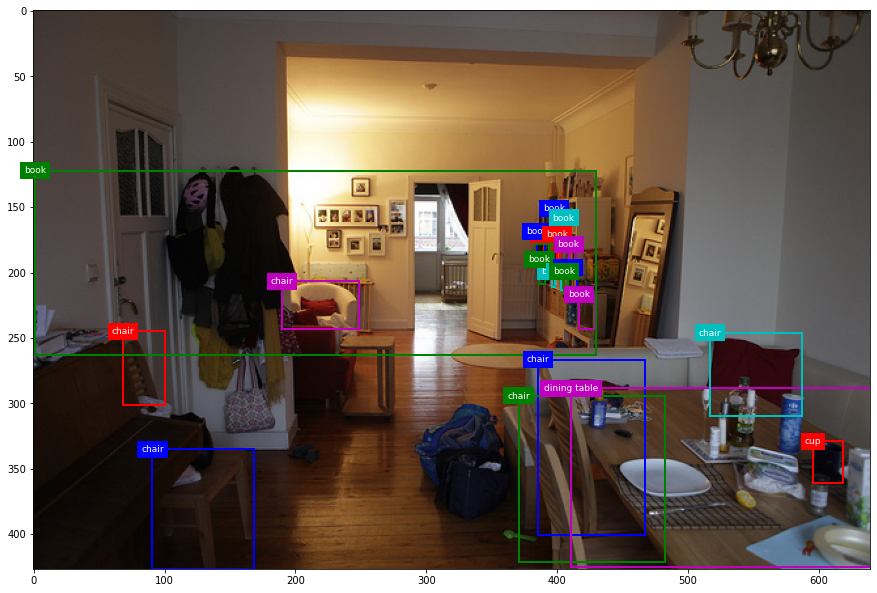

In [6]:
show_sample(505)